In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
class_names = [ "T-shirt/top" , "Trouser" , "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" , "Sneaker", "Bag" , "Ankle boot" ]

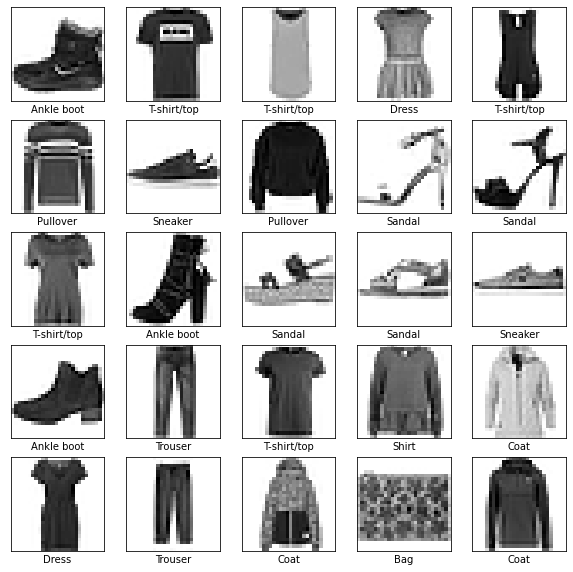

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_full[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_full[i]])
plt.show()

In [ ]:
X_valid, X_train = X_valid / 255., X_train / 255.
X_test = X_test / 255.

In [ ]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape = [28, 28]),
keras.layers.Dense(300, activation = "relu" ),
keras.layers.Dense(100, activation = "relu" ),
keras.layers.Dense(100, activation = "relu" ),
keras.layers.Dense(100, activation = "relu" ),
keras.layers.Dense(10, activation = "softmax" )])

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 286,810
Trainable params: 286,810
Non-trai

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy",
optimizer = "sgd",
metrics = ["accuracy"])

In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs = 10,
                    validation_data = (X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7809 - accuracy: 0.7379 - val_loss: 0.5235 - val_accuracy: 0.8174
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4864 - accuracy: 0.8281 - val_loss: 0.4522 - val_accuracy: 0.8374
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4321 - accuracy: 0.8467 - val_loss: 0.4008 - val_accuracy: 0.8568
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3986 - accuracy: 0.8580 - val_loss: 0.3896 - val_accuracy: 0.8612
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3722 - accuracy: 0.8646 - val_loss: 0.3636 - val_accuracy: 0.8712
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3555 - accuracy: 0.8719 - val_loss: 0.3529 - val_accuracy: 0.8752
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3402 - accuracy: 0.8750 - val_loss: 0.3722 - val_accuracy:

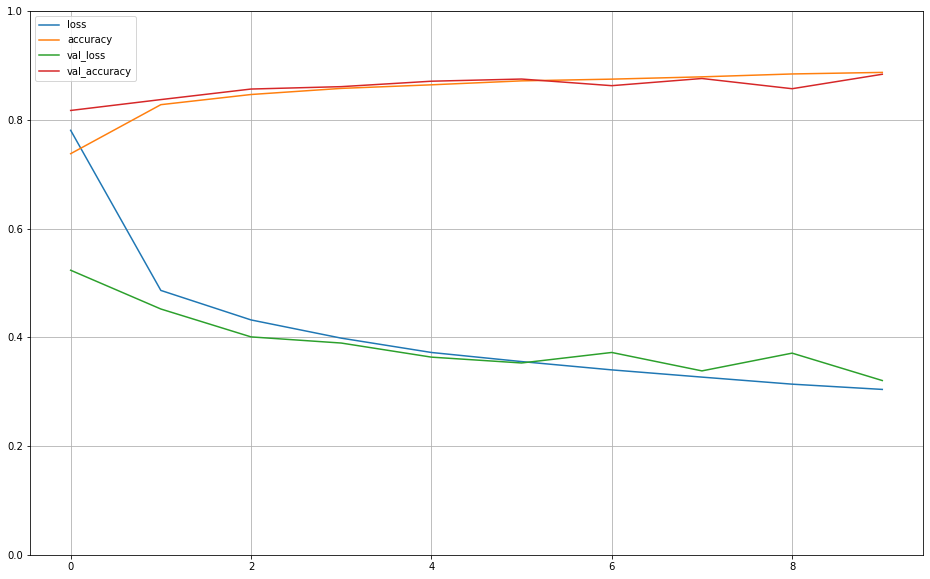

In [ ]:
pd.DataFrame(history.history).plot(figsize = (16, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3524 - accuracy: 0.8741


[0.3523639738559723, 0.8741000294685364]

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

#normalizing data sn building a test set

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [ ]:
model = keras.models.Sequential([keras.layers.Conv2D(64, 7, activation="relu", padding= "same", input_shape=[28, 28, 1]),
                                 keras.layers.MaxPooling2D(2),
                                 keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
                                 keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
                                 keras.layers.MaxPooling2D(2),
                                 keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
                                 keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
                                 keras.layers.MaxPooling2D(2),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(128, activation="relu"),
                                 keras.layers.Dropout(0.5),
                                 keras.layers.Dense(64, activation="relu"),
                                 keras.layers.Dropout(0.5),
                                 keras.layers.Dense(10, activation="softmax")
                                 ])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)        

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, 
                    y_train, 
                    epochs = 1, 
                    validation_data = (X_valid, y_valid))

1719/1719 [==============================] - 761s 443ms/step - loss: 0.3336 - accuracy: 0.8862 - val_loss: 0.2926 - val_accuracy: 0.8920


In [ ]:
model.evaluate(X_test,y_test)


313/313 [==============================] - 33s 106ms/step - loss: 0.3107 - accuracy: 0.8931


[0.31073158979415894, 0.8931000232696533]